In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Importing the necessary packages
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
fire_df = pd.read_csv('forestfires.csv')

In [3]:
fire_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
fire_df.shape

(517, 31)

In [5]:
fire_df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
fire_df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
pd.set_option("display.max_columns", 31)
fire_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


<Axes: >

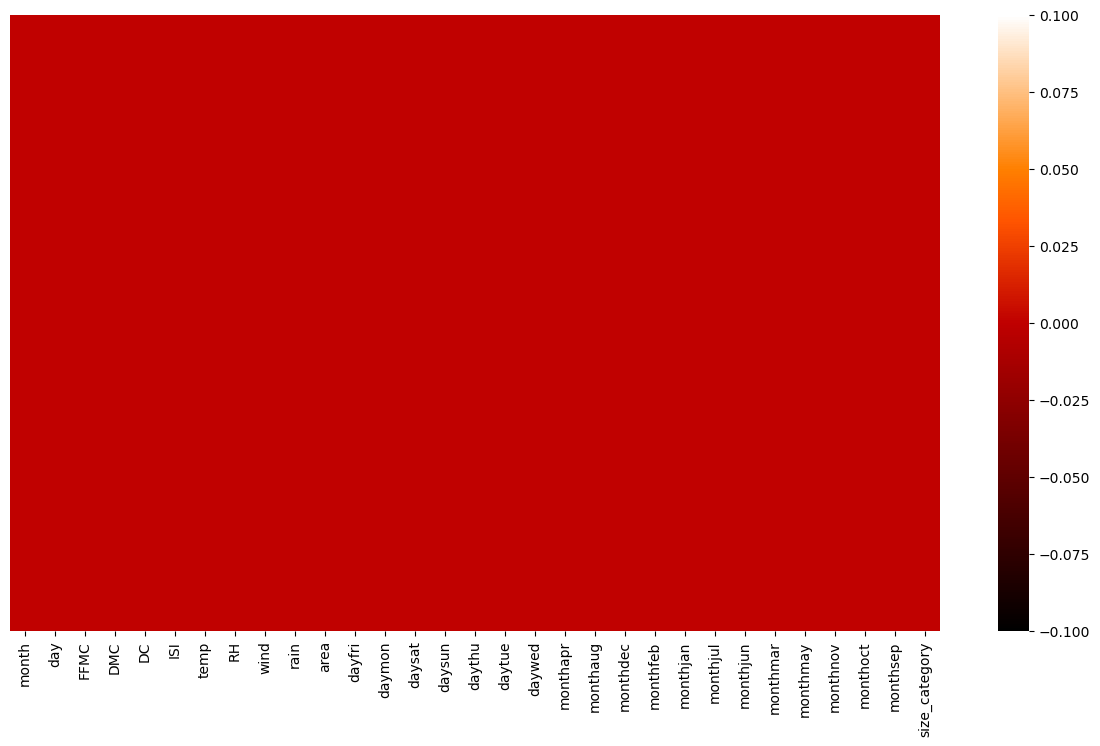

In [9]:
plt.rcParams['figure.figsize']=(15,8)
sns.heatmap(fire_df.isna(), cmap = ('gist_heat'), yticklabels = False)

In [10]:
y_count = fire_df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})

,size_category,counts
0,small,378
1,large,139


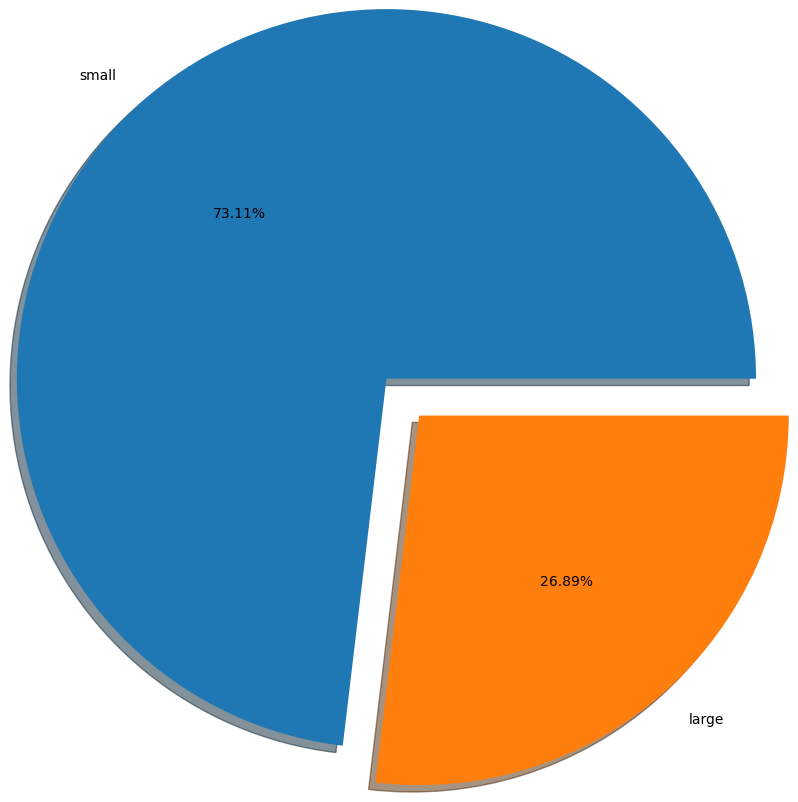

In [11]:
plt.pie(y_count.counts, labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.2), radius=1.5)
y_count

In [12]:
#Other features with target variable

month_df = fire_df.groupby(['size_category', 'month']).size().reset_index().rename(columns = {0:'count'}).sort_values('count', ascending = False)
month_df.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


Text(0.5, 1.02, 'Num of fires in each month')

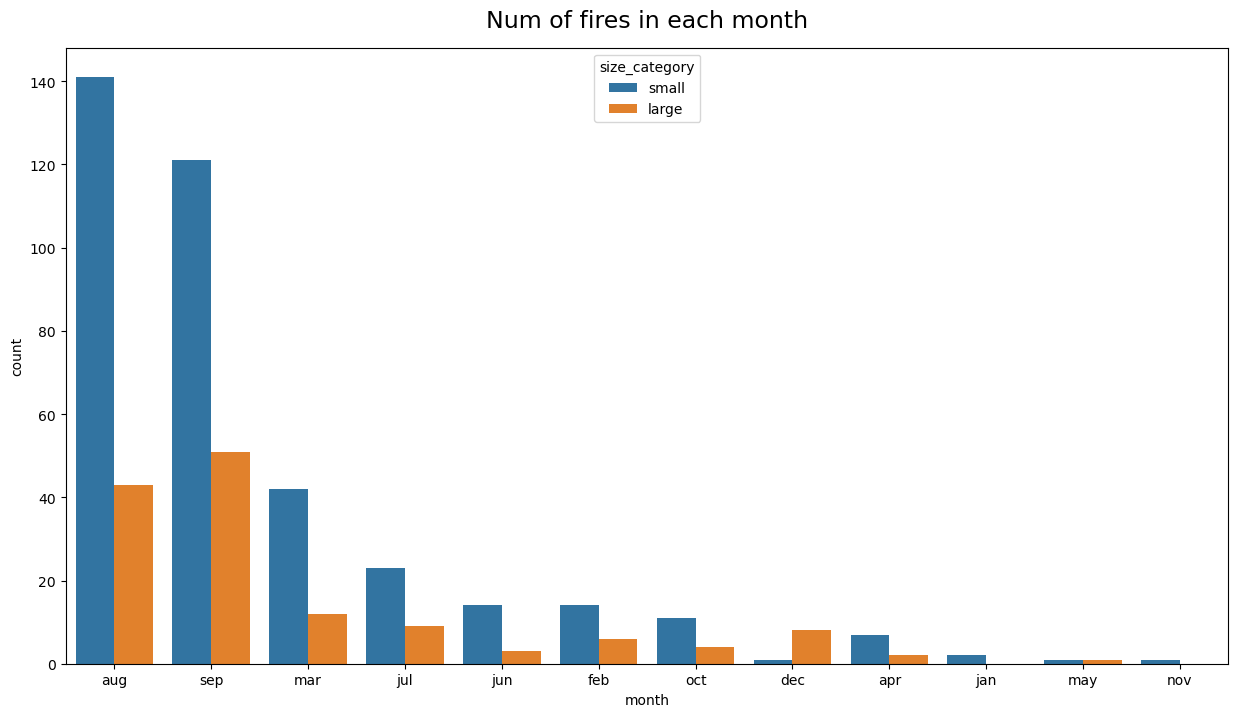

In [13]:
sns.barplot(x = 'month', y = 'count', hue='size_category', data = month_df)
plt.title("Num of fires in each month", fontsize = 17, y = 1.02)

In [14]:
day_df = fire_df.groupby(['size_category', 'day']).size().reset_index().rename(columns = {0:'count'}).sort_values('count', ascending = False)
day_df

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


Text(0.5, 1.02, 'Num of fires on each day')

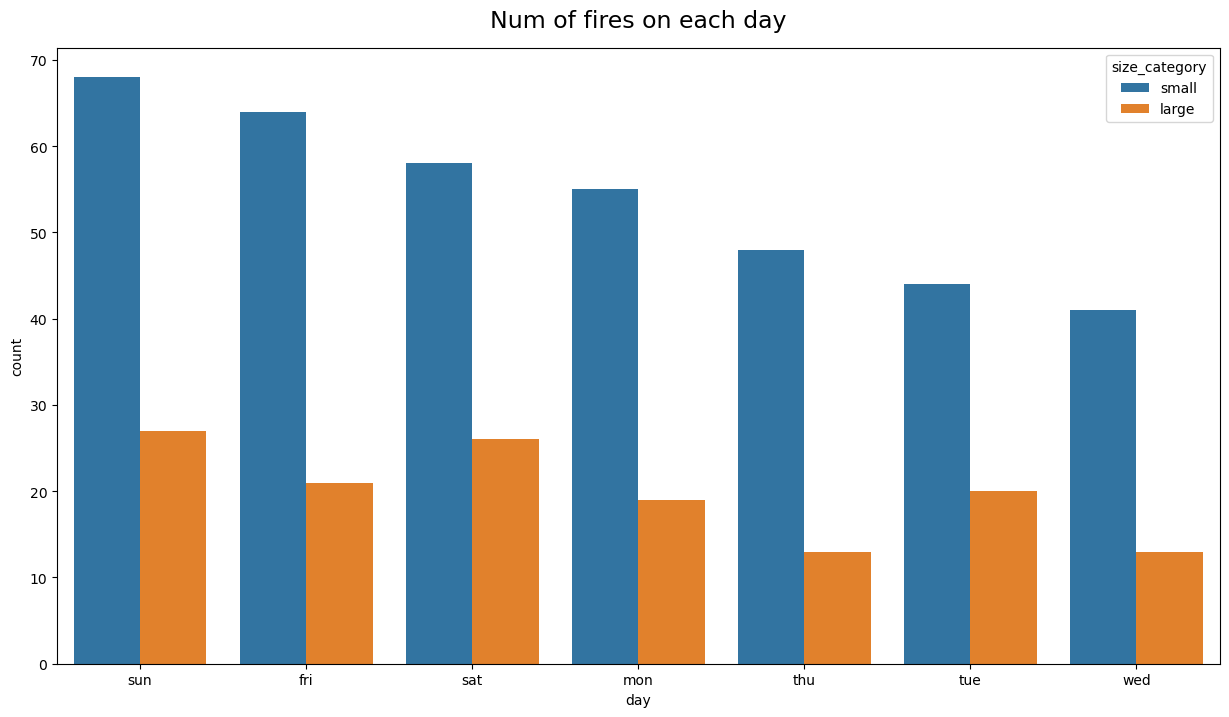

In [15]:
sns.barplot(x = 'day', y = 'count', hue = 'size_category', data = day_df)
plt.title("Num of fires on each day", fontsize = 17, y = 1.02)

In [16]:
labelencoder = LabelEncoder()
fire_df.iloc[:, -1] = labelencoder.fit_transform(fire_df.iloc[:,-1])
fire_df['size_category']                                                 #1 for small, 0 for large

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [17]:
rain_df = fire_df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

,size_category,rain,count
2,1,0.0,371
0,0,0.0,138
3,1,0.2,2
5,1,0.8,2
1,0,6.4,1
4,1,0.4,1
6,1,1.0,1
7,1,1.4,1


Text(0.5, 1.02, 'Rainfall level in diff category of forest')

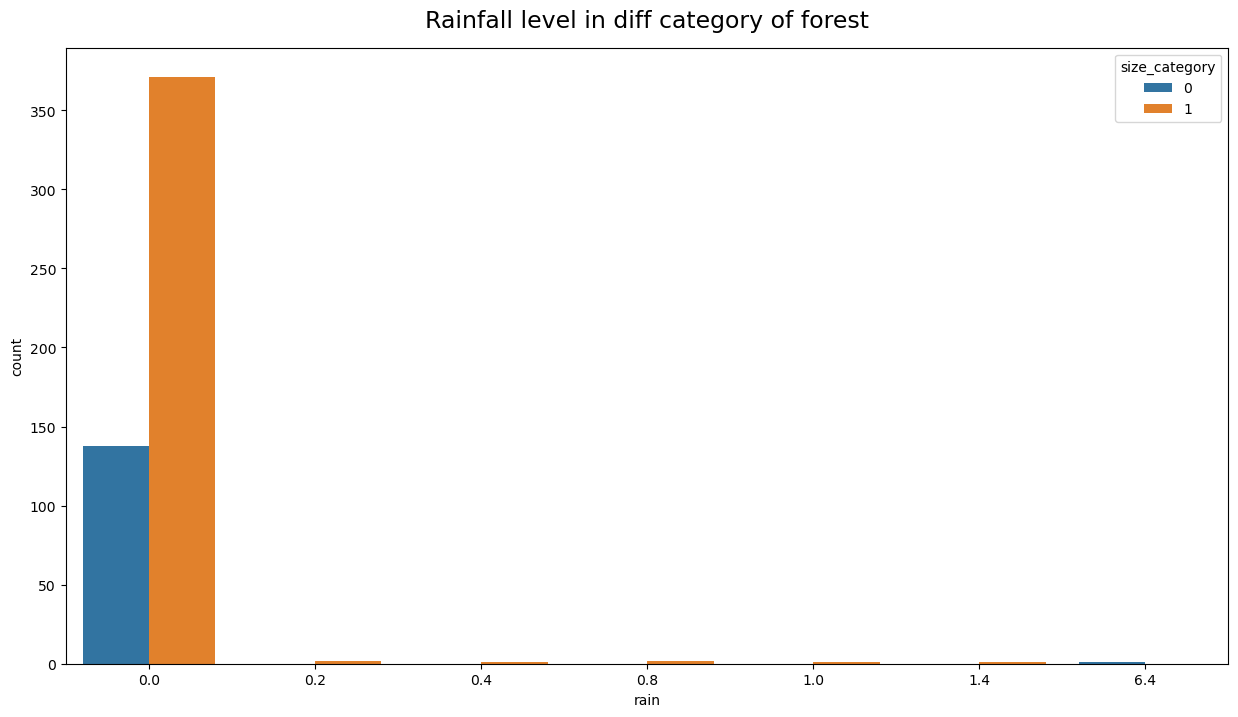

In [18]:
sns.barplot(x = 'rain', y = 'count', hue = 'size_category', data = rain_df)
plt.title("Rainfall level in diff category of forest", y = 1.02, fontsize = 17)

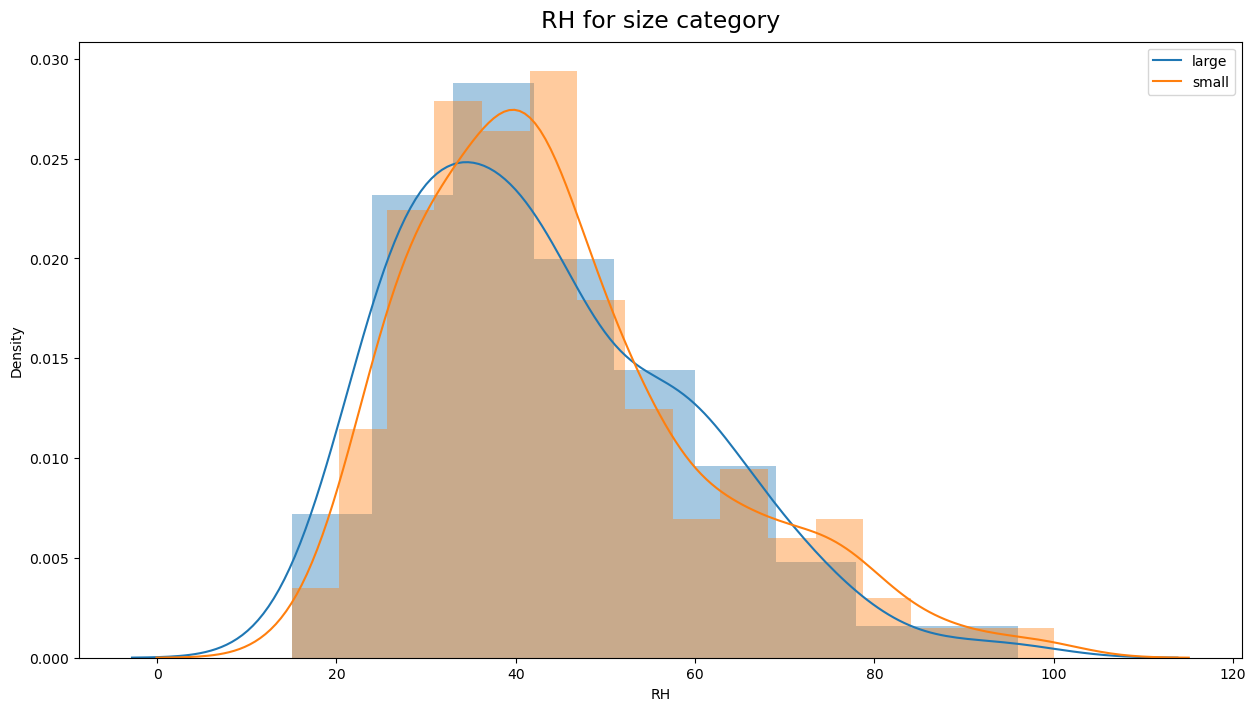

In [19]:
sns.distplot(fire_df[fire_df['size_category'] == 0]['RH'])
sns.distplot(fire_df[fire_df['size_category'] == 1]['RH'])                 #orange for small fire, blue for small fire
plt.title("RH for size category", y = 1.01, fontsize = 17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc = 0, frameon = legend_drawn_flag)

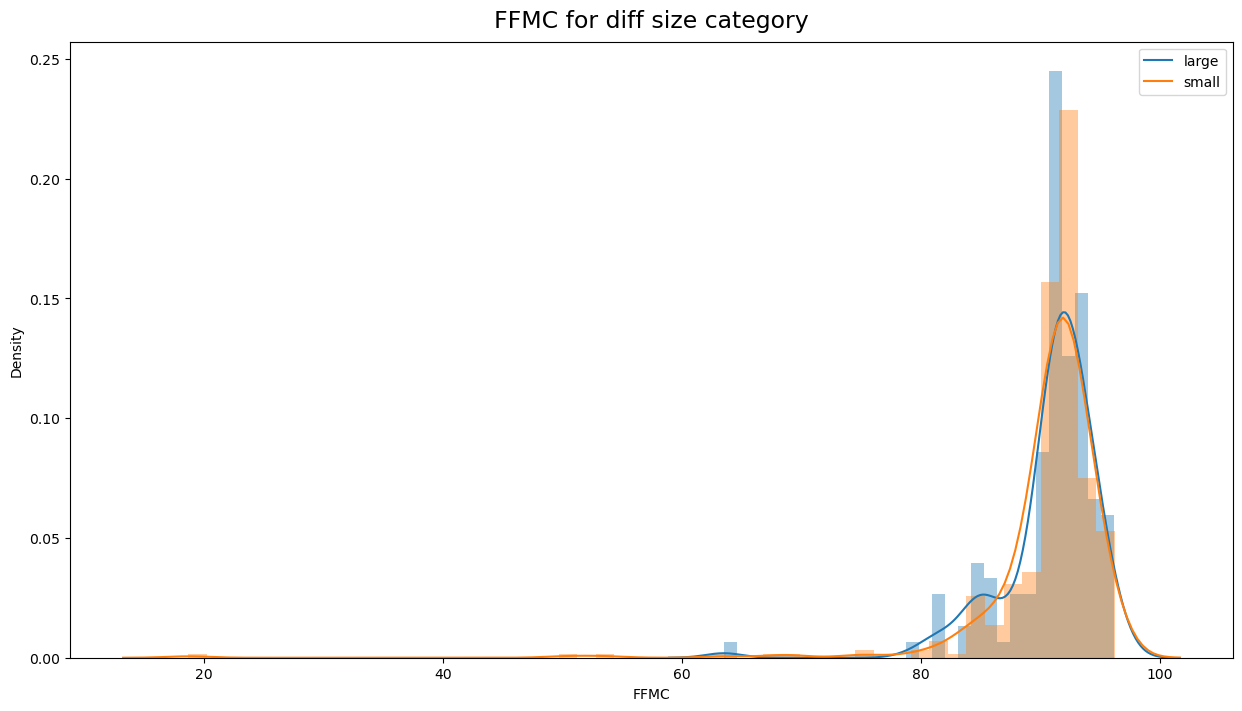

In [20]:
sns.distplot(fire_df[fire_df['size_category'] == 0]['FFMC'])
sns.distplot(fire_df[fire_df['size_category'] == 1]['FFMC'])                 #orange for small fire, blue for small fire
plt.title("FFMC for diff size category", y = 1.01, fontsize = 17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon = legend_drawn_flag)

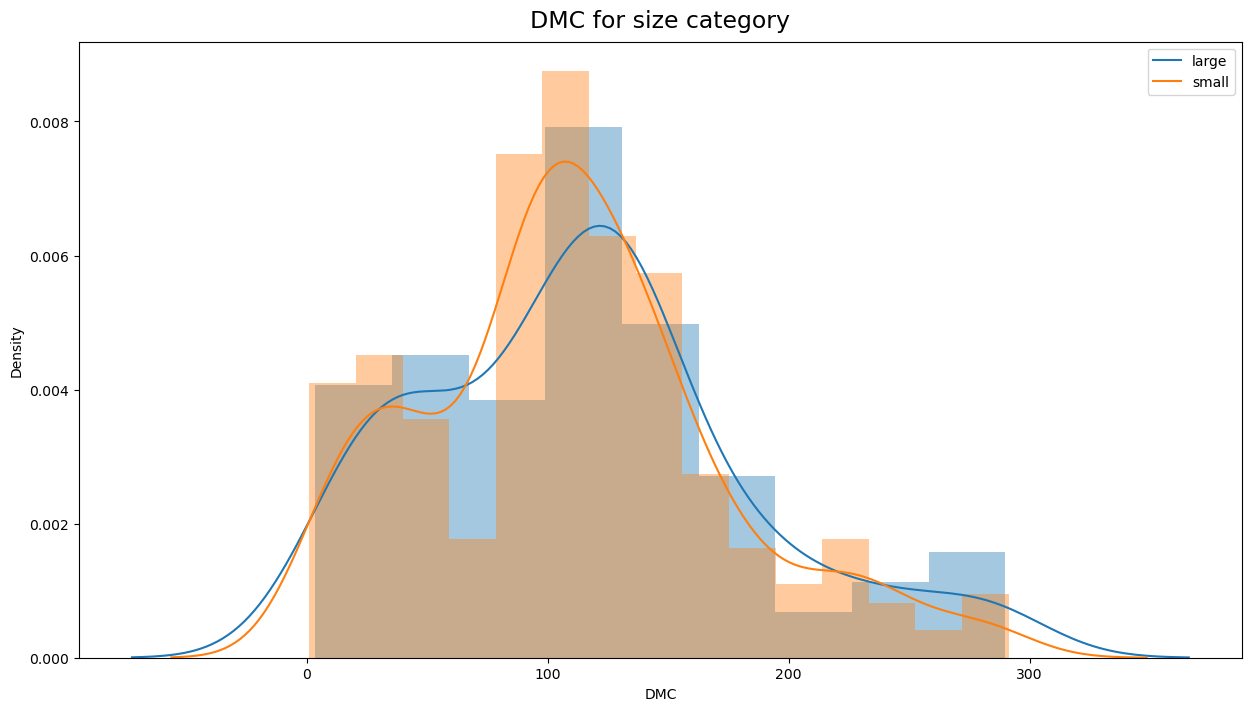

In [21]:
sns.distplot(fire_df[fire_df['size_category'] == 0]['DMC'])
sns.distplot(fire_df[fire_df['size_category'] == 1]['DMC'])                 #orange for small fire, blue for large fire
plt.title("DMC for size category", y = 1.01, fontsize = 17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon = legend_drawn_flag)

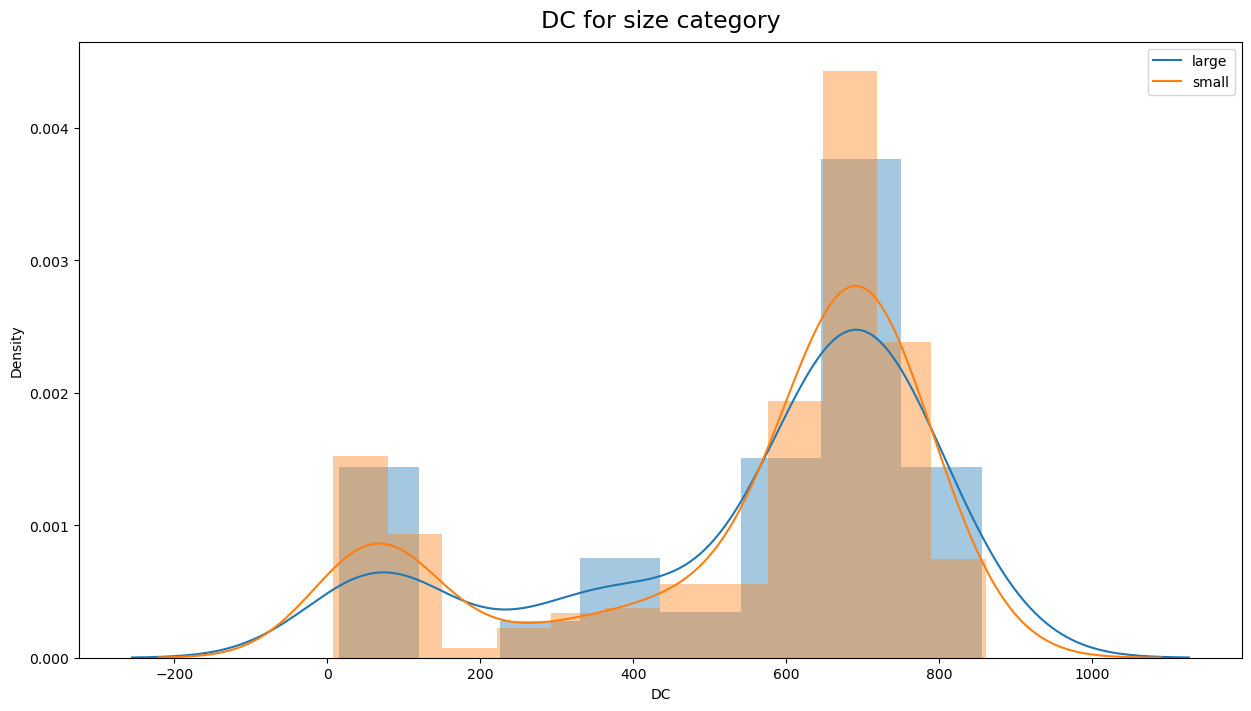

In [22]:
sns.distplot(fire_df[fire_df['size_category'] == 0]['DC'])
sns.distplot(fire_df[fire_df['size_category'] == 1]['DC'])                 #orange for small fire, blue for large fire
plt.title("DC for size category", y = 1.01, fontsize = 17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc = 0, frameon = legend_drawn_flag)

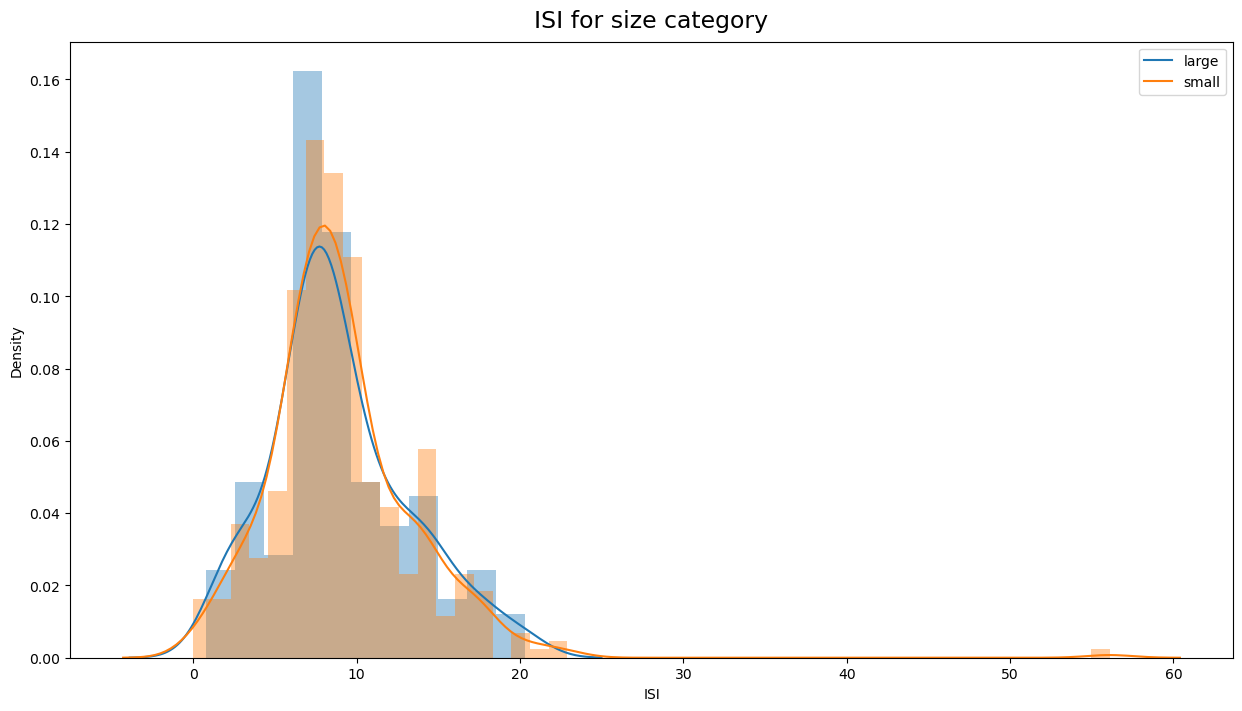

In [23]:
sns.distplot(fire_df[fire_df['size_category'] == 0]['ISI'])
sns.distplot(fire_df[fire_df['size_category'] == 1]['ISI'])                 #orange for small fire, blue for large fire
plt.title("ISI for size category", y = 1.01, fontsize = 17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon = legend_drawn_flag)

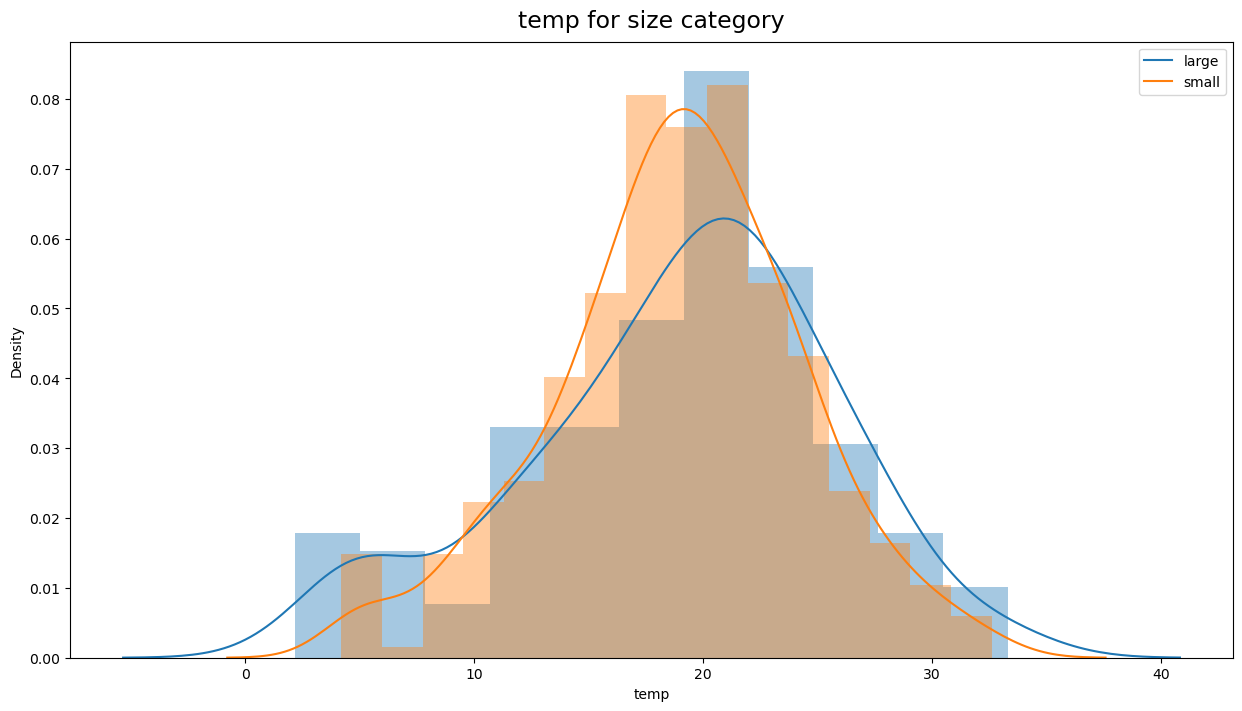

In [24]:
sns.distplot(fire_df[fire_df['size_category'] == 0]['temp'])
sns.distplot(fire_df[fire_df['size_category'] == 1]['temp'])                 #orange for small fire, blue for large fire
plt.title("temp for size category", y = 1.01, fontsize = 17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc = 0, frameon = legend_drawn_flag)

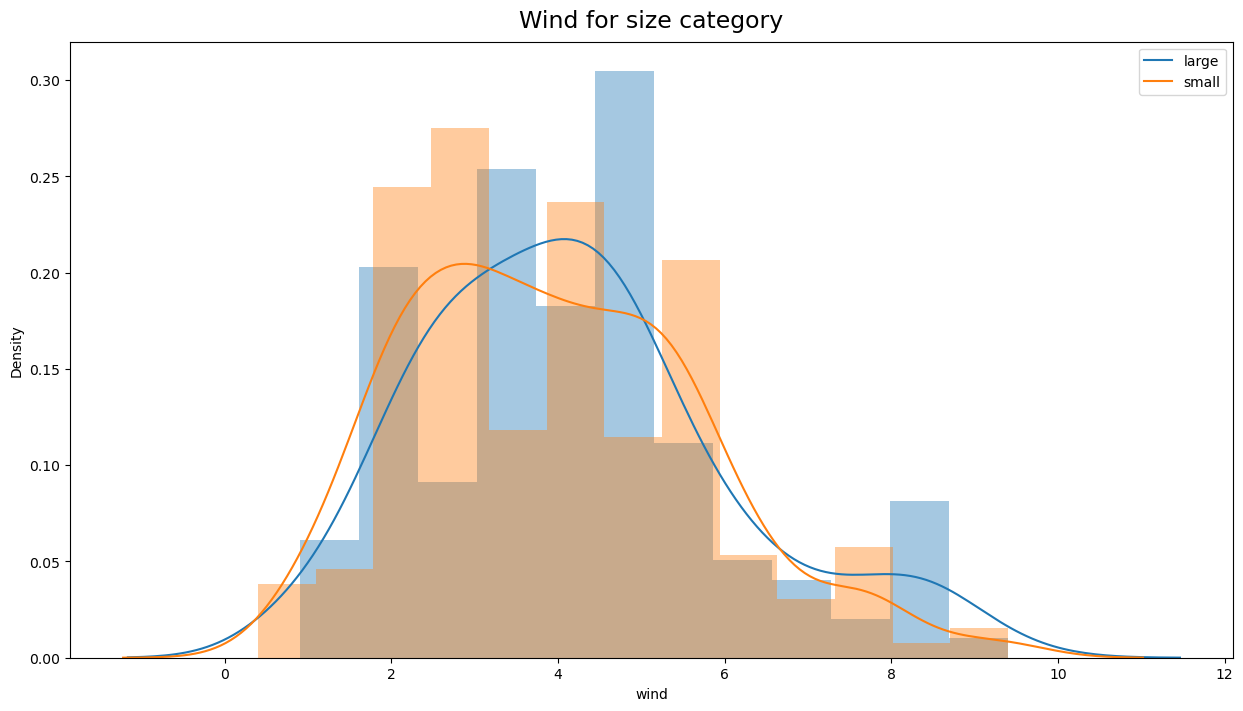

In [25]:
sns.distplot(fire_df[fire_df['size_category'] == 0]['wind'])
sns.distplot(fire_df[fire_df['size_category'] == 1]['wind'])                 #orange for small fire, blue for large fire
plt.title("Wind for size category", y = 1.01, fontsize = 17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc = 0, frameon = legend_drawn_flag)

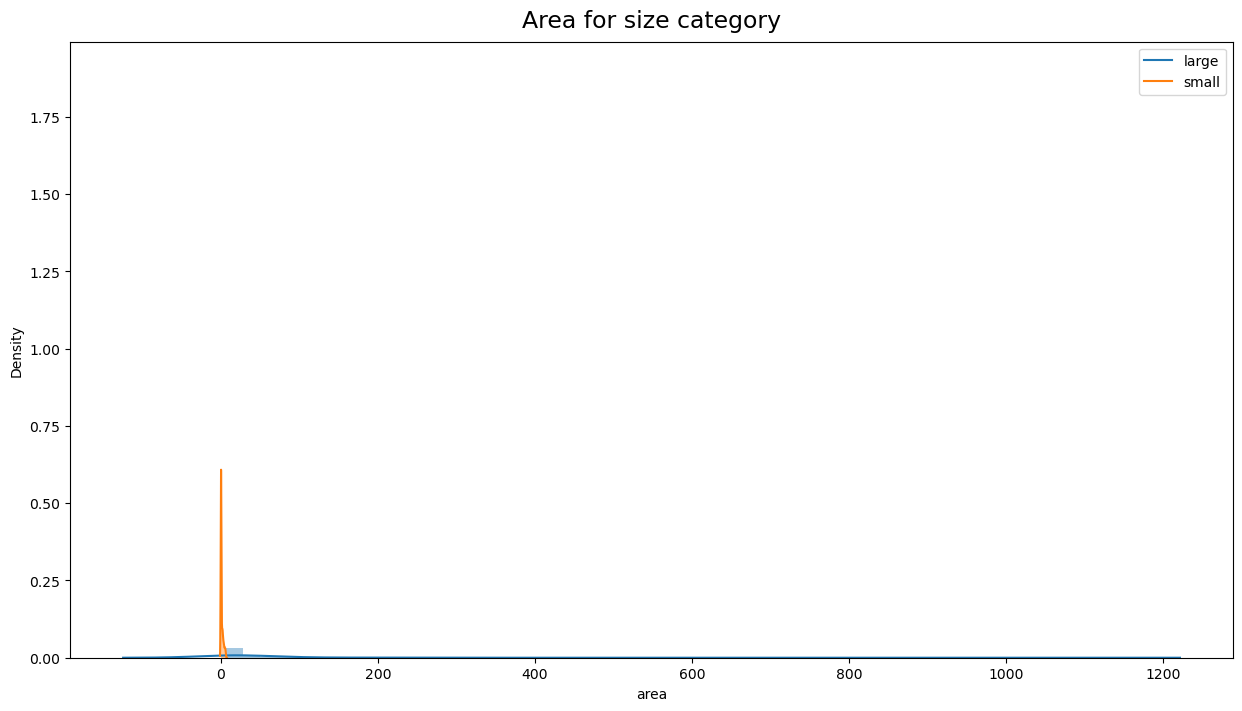

In [26]:
sns.distplot(fire_df[fire_df['size_category'] == 0]['area'])
sns.distplot(fire_df[fire_df['size_category'] == 1]['area'])                 #orange for small fire, blue for large fire
plt.title("Area for size category", y = 1.01, fontsize = 17)
legend_drawn_flag = True
plt.legend(["large", "small"],loc = 0, frameon = legend_drawn_flag) 

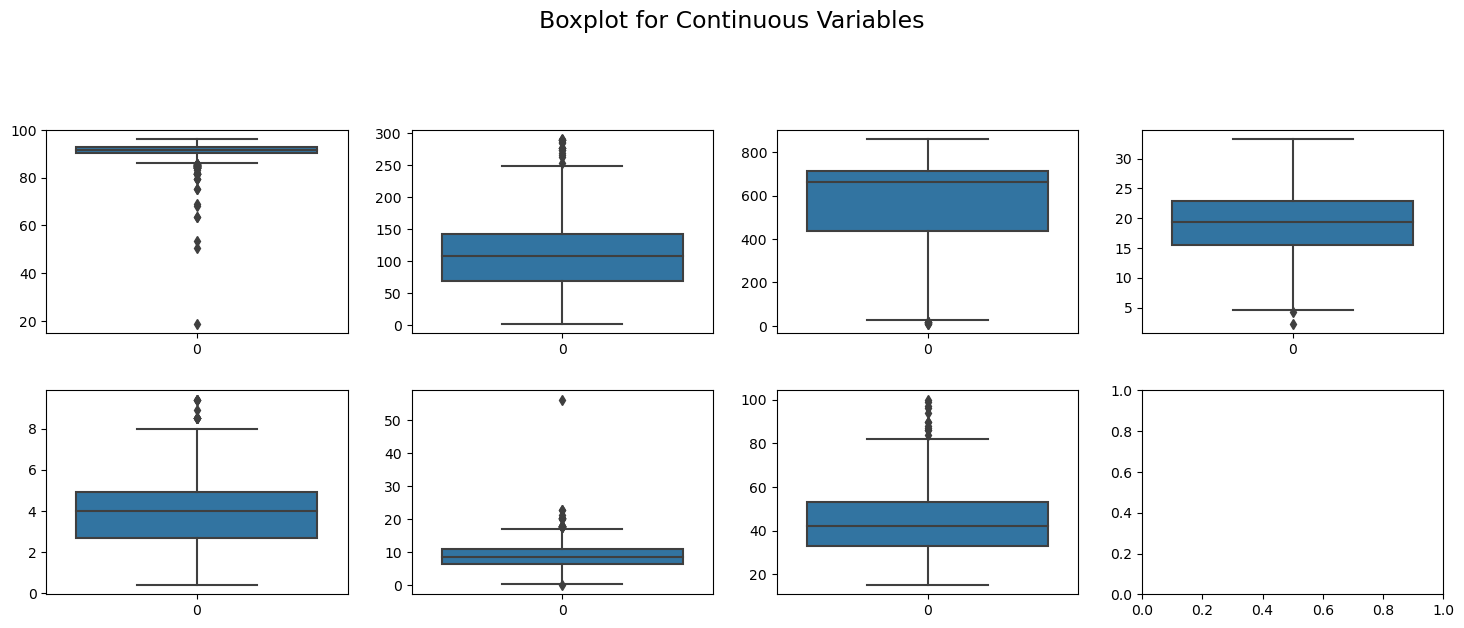

In [27]:
#check for outliers
fig, ax = plt.subplots(2,4, figsize = (15,6), sharex = False, sharey = False)
sns.boxplot(fire_df.FFMC, ax = ax[0,0])
sns.boxplot(fire_df.DMC, ax = ax[0,1])
sns.boxplot(fire_df.DC, ax = ax[0,2])
sns.boxplot(fire_df.temp, ax = ax[0,3])
sns.boxplot(fire_df.wind, ax = ax[1,0])
sns.boxplot(fire_df.ISI, ax = ax[1,1])
sns.boxplot(fire_df.RH, ax = ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize = 17, y = 1.06)
plt.tight_layout(pad = 2.0)

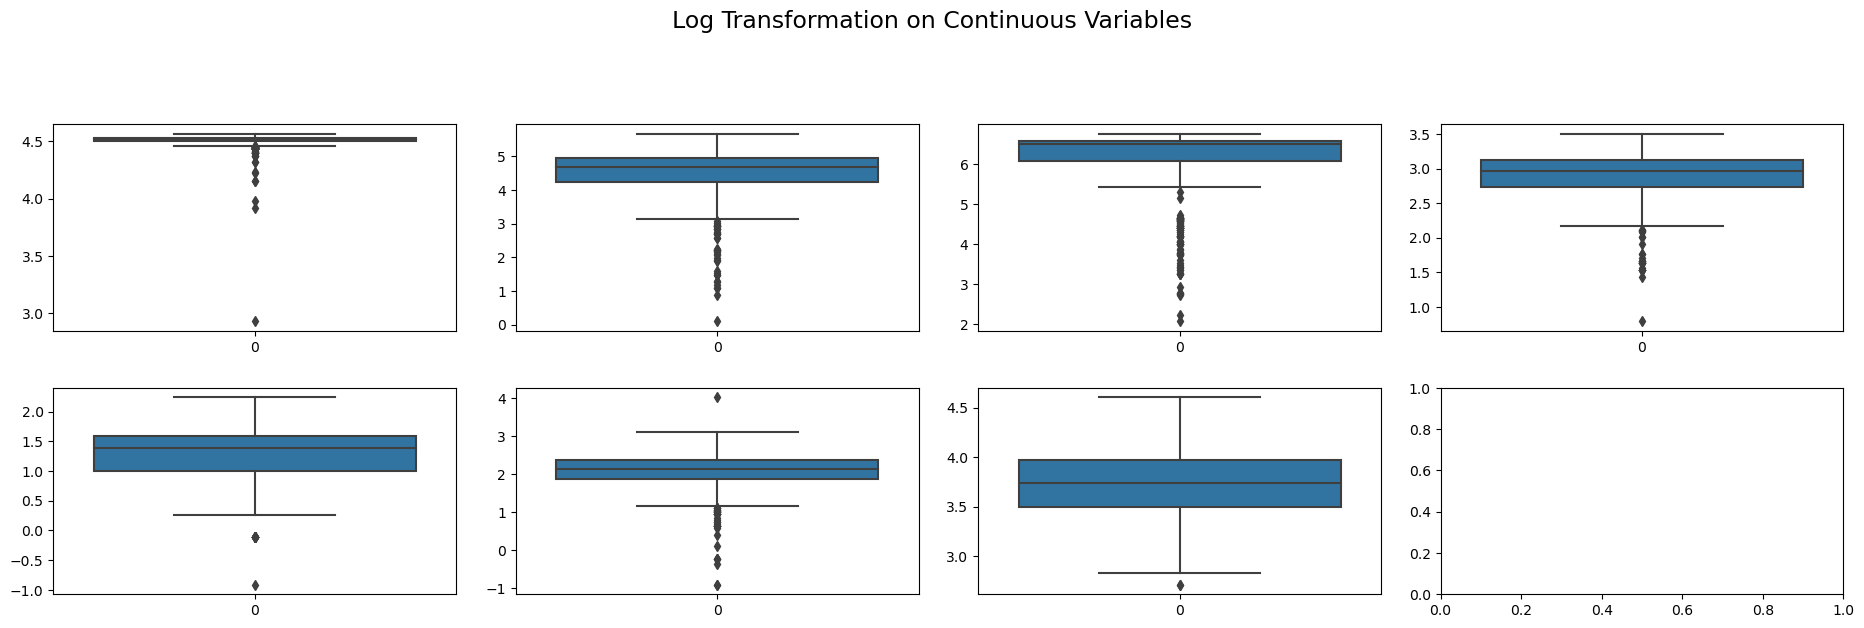

In [28]:
#Let ustry to treat our outliers by log tranformations
fig, ax = plt.subplots(2,4, figsize = (19,6), sharex = False, sharey = False)
sns.boxplot(np.log(fire_df.FFMC), ax = ax[0,0])
sns.boxplot(np.log(fire_df.DMC), ax = ax[0,1])
sns.boxplot(np.log(fire_df.DC), ax = ax[0,2])
sns.boxplot(np.log(fire_df.temp), ax = ax[0,3])
sns.boxplot(np.log(fire_df.wind), ax = ax[1,0])
sns.boxplot(np.log(fire_df.ISI), ax = ax[1,1])
sns.boxplot(np.log(fire_df.RH), ax = ax[1,2])
plt.suptitle("Log Transformation on Continuous Variables", fontsize = 17, y = 1.06)
plt.tight_layout(pad = 2.0)

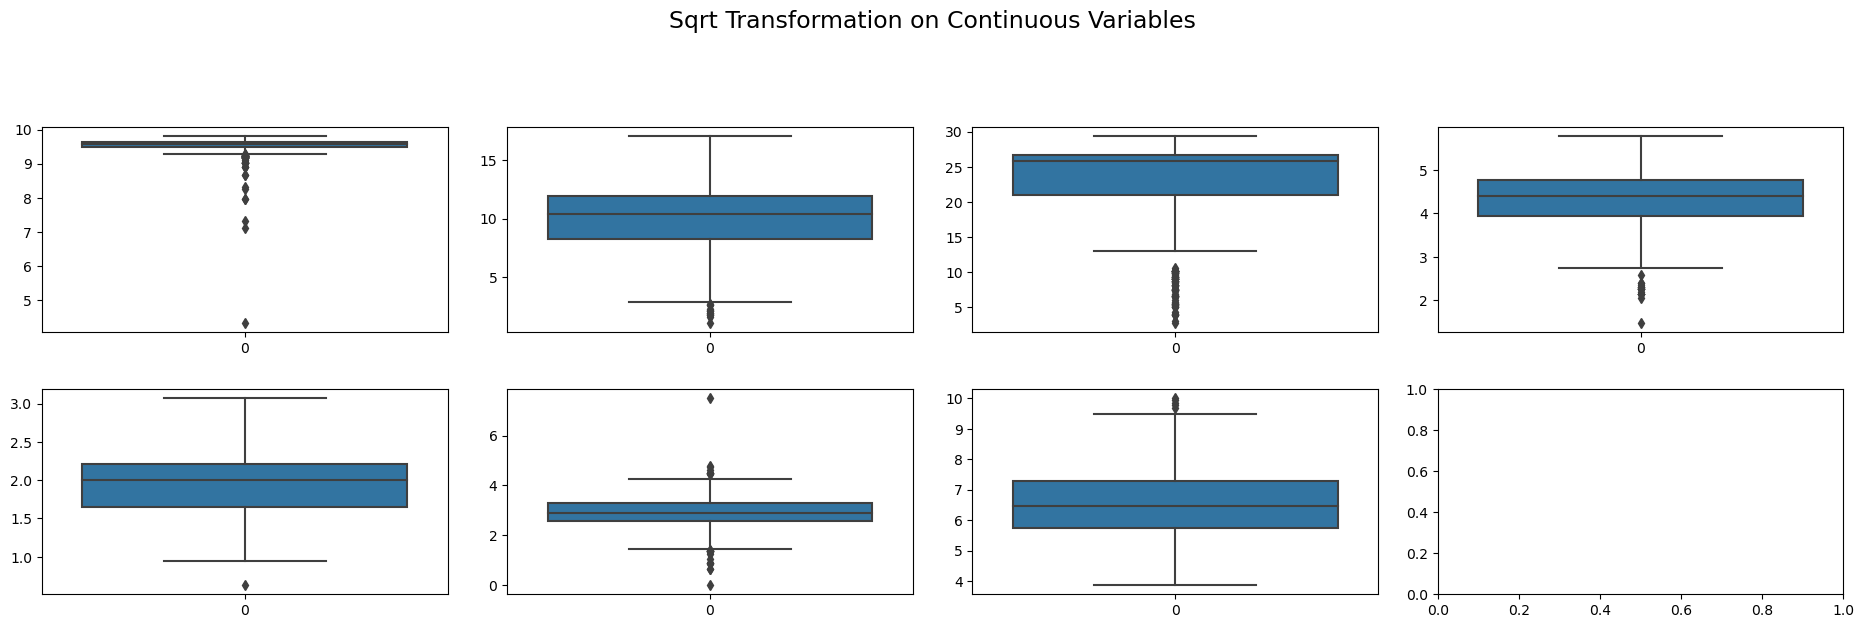

In [29]:
#Let ustry to treat our outliers by sqrt tranformations
fig, ax = plt.subplots(2,4, figsize = (19,6), sharex = False, sharey = False)
sns.boxplot(np.sqrt(fire_df.FFMC), ax = ax[0,0])
sns.boxplot(np.sqrt(fire_df.DMC), ax = ax[0,1])
sns.boxplot(np.sqrt(fire_df.DC), ax = ax[0,2])
sns.boxplot(np.sqrt(fire_df.temp), ax = ax[0,3])
sns.boxplot(np.sqrt(fire_df.wind), ax = ax[1,0])
sns.boxplot(np.sqrt(fire_df.ISI), ax = ax[1,1])
sns.boxplot(np.sqrt(fire_df.RH), ax = ax[1,2])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize = 17, y = 1.06)
plt.tight_layout(pad = 2.0)

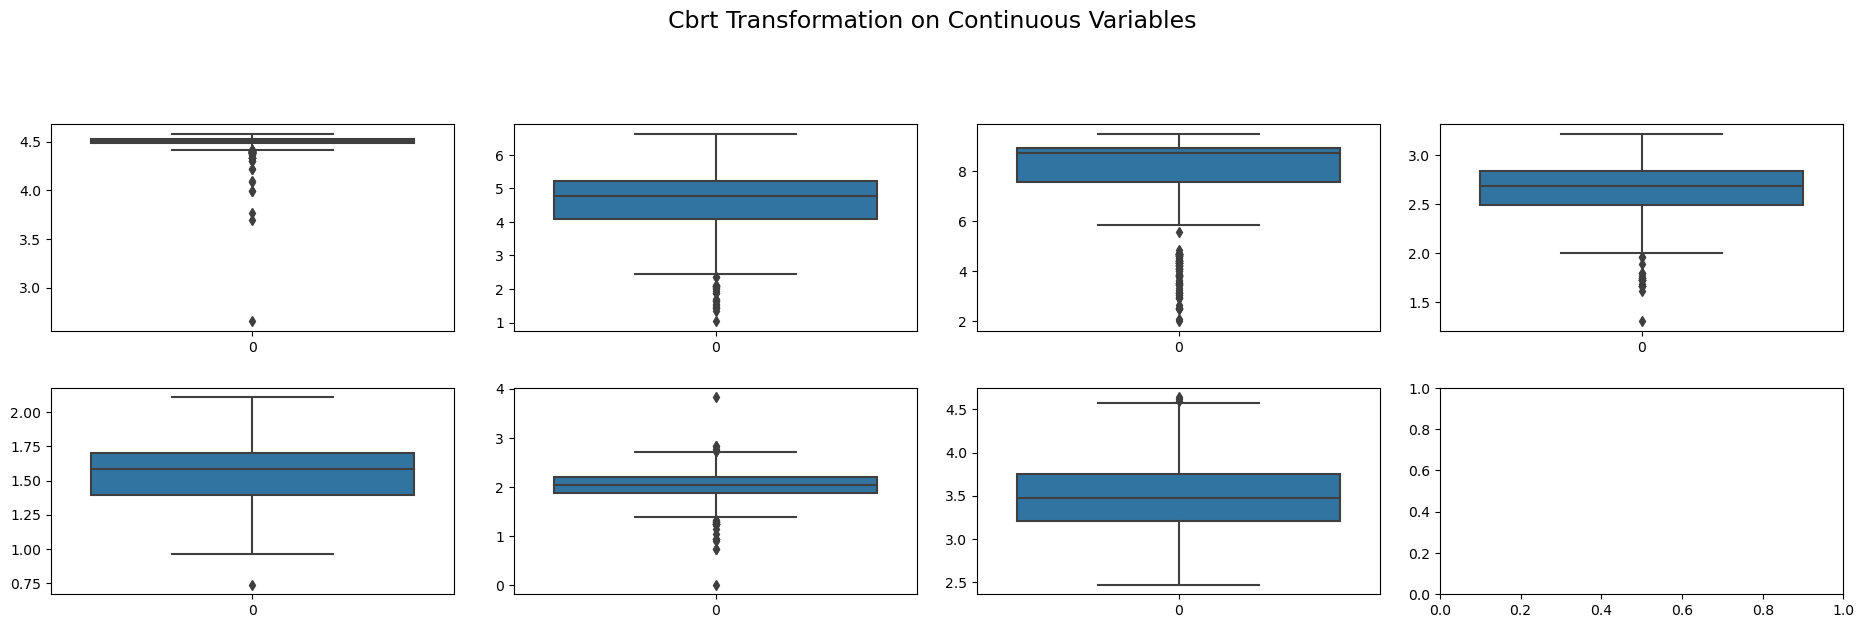

In [30]:
#Let ustry to treat our outliers by cbrt tranformations
fig, ax = plt.subplots(2,4, figsize = (19,6), sharex = False, sharey = False)
sns.boxplot(np.cbrt(fire_df.FFMC), ax = ax[0,0])
sns.boxplot(np.cbrt(fire_df.DMC), ax = ax[0,1])
sns.boxplot(np.cbrt(fire_df.DC), ax = ax[0,2])
sns.boxplot(np.cbrt(fire_df.temp), ax = ax[0,3])
sns.boxplot(np.cbrt(fire_df.wind), ax = ax[1,0])
sns.boxplot(np.cbrt(fire_df.ISI), ax = ax[1,1])
sns.boxplot(np.cbrt(fire_df.RH), ax = ax[1,2])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize = 17, y = 1.06)
plt.tight_layout(pad = 2.0)

none of them are helpful to treat the outliers 

# Dependency of Target variable on diff Features



In [31]:
fire_df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [32]:
#to get correlation of target variable with numerical columns

df1 = fire_df.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [33]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index = df1.columns)
corr

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


Text(0.5, 1.01, 'Correlation plot of Target variable with other continuous features')

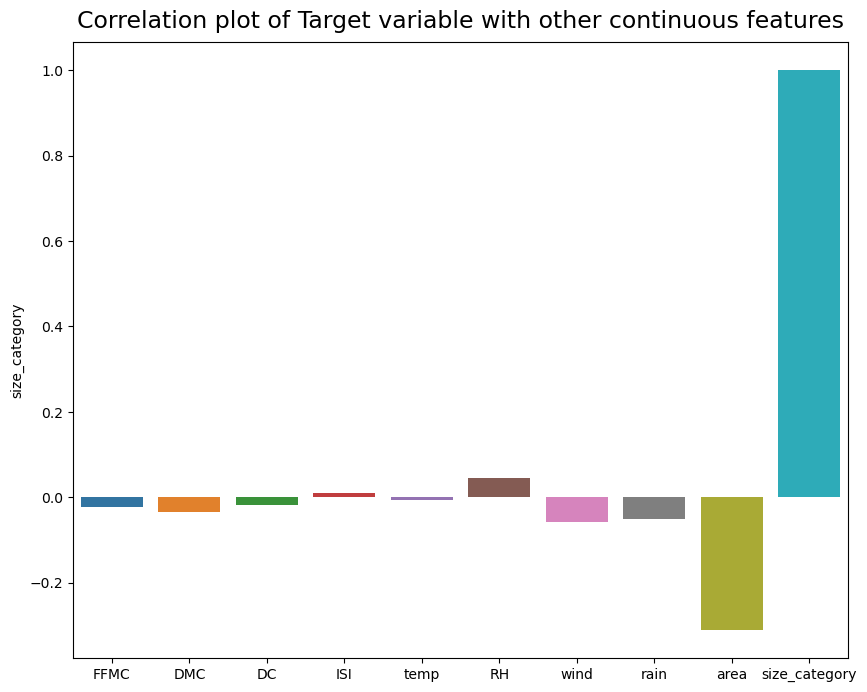

In [34]:
fig , ax = plt.subplots(figsize = (10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize = 17, y = 1.01)

Text(0.5, 1.0, 'Correlation Map of Numerical variables')

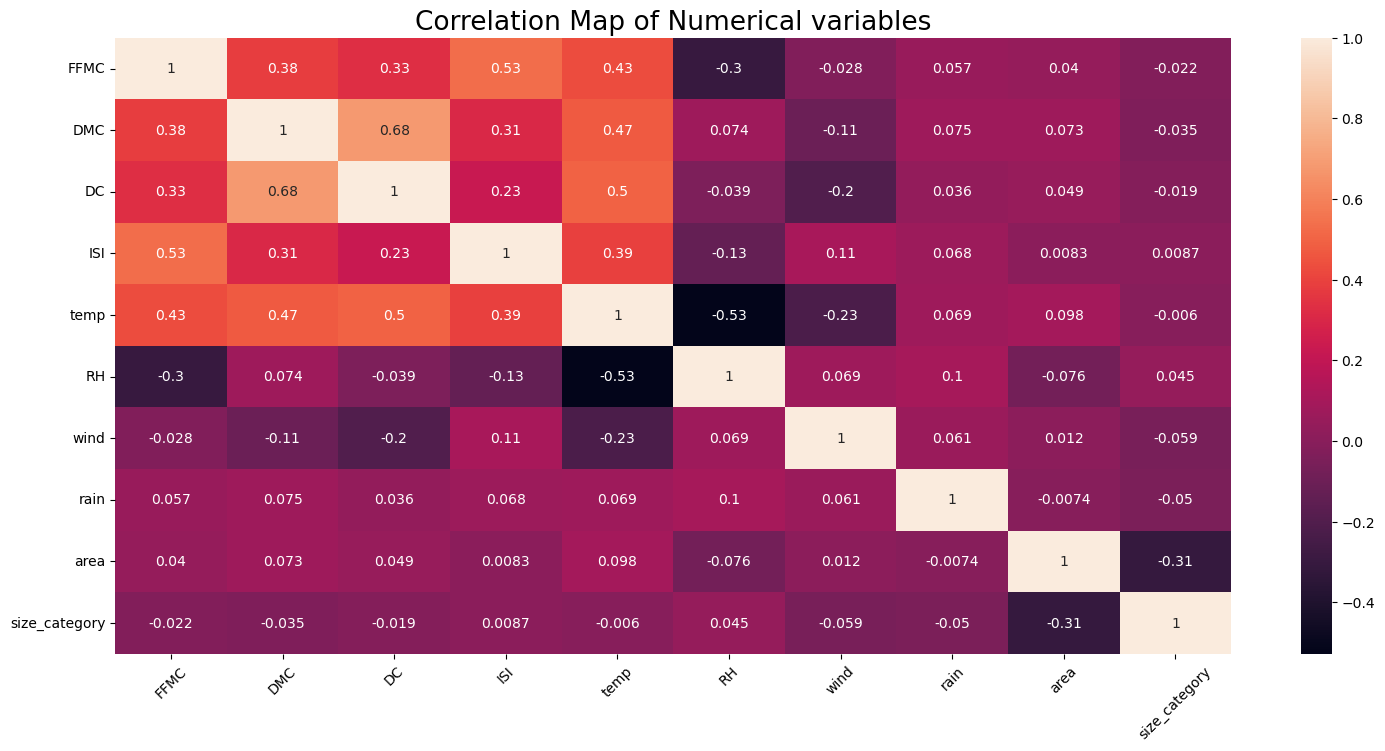

In [35]:
fig = plt.figure(figsize = (18, 8))
sns.heatmap(df1.corr(), annot = True);
plt.xticks(rotation = 45)
plt.title("Correlation Map of Numerical variables", fontsize = 19)

In [ ]:
sns.pairplot(df1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize = 17)

Text(0.5, 1.01, 'Pairplot for all numerical variables')

# data preprocessing

In [ ]:
#drop the unnecessary columns
fire_df.drop(['month', 'day', 'monthjan', 'daymon'], axis = 1, inplace = True)

In [ ]:
pd.set_option("display.max_columns", 27)
fire_df.head()

In [39]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1 = fire_df.copy()

#training the model
clf = IsolationForest(random_state = 10, contamination = .01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly'] == -1]

In [40]:
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,...,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,-1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
464,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
469,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,-1


In [41]:
outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [42]:
fire_df.shape

(517, 27)

In [43]:
# splitting the data into target variables and independent variables

x = fire_df.drop('size_category', axis=1)
y = fire_df['size_category']

In [44]:
# converting the independent variables in to standardized and normalized data

minmax = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(minmax.fit_transform(x), columns = x.columns)            #data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns = x.columns)            #data between -1 to +1

In [45]:
x_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,2.254407,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,-0.443576,-0.440449,-0.474467,-0.365748,2.660475,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,-0.443576,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,2.254407,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,-0.443576,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081


In [46]:
# creating the train test split for model validation

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.25, random_state = 2)

In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((387, 26), (130, 26), (387,), (130,))

In [48]:
# building a model
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 26, kernel_initializer = 'uniform', activation ='relu'))
    model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    adam = tf.keras.optimizers.legacy.Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

In [49]:
#get best value for batch size and epochs by hyperparameter tuning
import tensorflow as tf
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.910 total time=   0.5s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.910 total time=   0.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.909 total time=   0.3s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.909 total time=   0.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.883 total time=   0.3s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.935 total time=   0.5s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.948 total time=   0.5s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.896 total time=   0.5s


In [50]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9303030303030303, using {'batch_size': 20, 'epochs': 50}
0.9043623043623044,0.010635490565423213 with: {'batch_size': 10, 'epochs': 10}
0.9173826173826175,0.026472667779496226 with: {'batch_size': 10, 'epochs': 50}
0.9173493173493175,0.022336504649975598 with: {'batch_size': 10, 'epochs': 100}
0.8836496836496837,0.03683326904224032 with: {'batch_size': 20, 'epochs': 10}
0.9303030303030303,0.03524672852482201 with: {'batch_size': 20, 'epochs': 50}
0.9173826173826173,0.026407661265027808 with: {'batch_size': 20, 'epochs': 100}
0.7574092574092575,0.074634133758638 with: {'batch_size': 40, 'epochs': 10}
0.9095904095904096,0.016120793409745718 with: {'batch_size': 40, 'epochs': 50}
0.9173826173826175,0.02075914567711849 with: {'batch_size': 40, 'epochs': 100}


In [53]:
#get best value for learning rate and dropuout by hyperparameter tuning
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12,input_dim = 26,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = tf.keras.optimizers.legacy.Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100, dropout_rate = 0.0, learning_rate = 0.001)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.910 total time=   1.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.923 total time=   1.2s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.948 total time=   1.1s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.922 total time=   1.1s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.896 total time=   1.1s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [54]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9302697302697304, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.91991341991342,0.017126709241650766 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9251082251082252,0.02356372098921005 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.765034965034965,0.05952993594892406 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9147852147852149,0.03009637776781458 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.92001332001332,0.03160708231321434 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7444222444222444,0.05140472545679976 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9302697302697304,0.023926809667063207 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9225774225774226,0.03144870377362077 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7366300366300367,0.03828785639701483 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [55]:
# Defining the model
#get best value for kernel initializer and activation func by hyperparameter tuning

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 26,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = tf.keras.optimizers.legacy.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100, activation_function = 'softmax', init = 'uniform')

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.859 total time=   1.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.769 total time=   1.2s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.844 total time=   1.1s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.831 total time=   1.1s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.818 total time=   1.6s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.987 total time=   1.1s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.948 total time=   1.1s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.909 total time=   1.1s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.923 total time=   1.2s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.949 total time=   1.2s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.987 total time=   1.1s
[CV 4/5; 11/12] START activation_f

In [56]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9508824508824508, using {'activation_function': 'tanh', 'init': 'normal'}
0.8243423243423245,0.030704364277982156 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.813986013986014,0.044219811234801246 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7882783882783884,0.06061014063764101 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9277056277056277,0.03325978253364207 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9224775224775226,0.027119723759620004 with: {'activation_function': 'relu', 'init': 'normal'}
0.7340326340326341,0.035660837590126844 with: {'activation_function': 'relu', 'init': 'zero'}
0.9457542457542457,0.0250619864648775 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9508824508824508,0.02514362008945073 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7340326340326341,0.035660837590126844 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9483183483183483,0.02594297006926384 with: {'activa

In [57]:
# Defining the model
#get best value for neuron by hyperparameter tuning

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = tf.keras.optimizers.legacy.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100, neuron1 = 4, neuron2 = 2)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)
     

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.936 total time=   1.2s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.949 total time=   1.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=   1.1s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.948 total time=   1.1s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.909 total time=   1.1s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [58]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9586080586080585, using {'neuron1': 4, 'neuron2': 4}
0.9405594405594405,0.01763015849743463 with: {'neuron1': 4, 'neuron2': 2}
0.9586080586080585,0.025235098320786034 with: {'neuron1': 4, 'neuron2': 4}
0.9457542457542457,0.02228476444526521 with: {'neuron1': 4, 'neuron2': 8}
0.9405594405594405,0.024025922102789078 with: {'neuron1': 8, 'neuron2': 2}
0.9509157509157509,0.022276552514899788 with: {'neuron1': 8, 'neuron2': 4}
0.9509157509157509,0.022276552514899788 with: {'neuron1': 8, 'neuron2': 8}
0.9431901431901432,0.023839056362629975 with: {'neuron1': 16, 'neuron2': 2}
0.9508824508824508,0.017271774211935233 with: {'neuron1': 16, 'neuron2': 4}
0.9483849483849485,0.019907460654578303 with: {'neuron1': 16, 'neuron2': 8}


In [59]:
# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = tf.keras.optimizers.legacy.Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Fitting the model

model.fit(x_train,y_train)

# Predicting using trained model

y_predict = model.predict(x_test)


# Printing the metrics

print("Test Accuracy:", accuracy_score(y_test,y_predict))

Test Accuracy: 0.9538461538461539


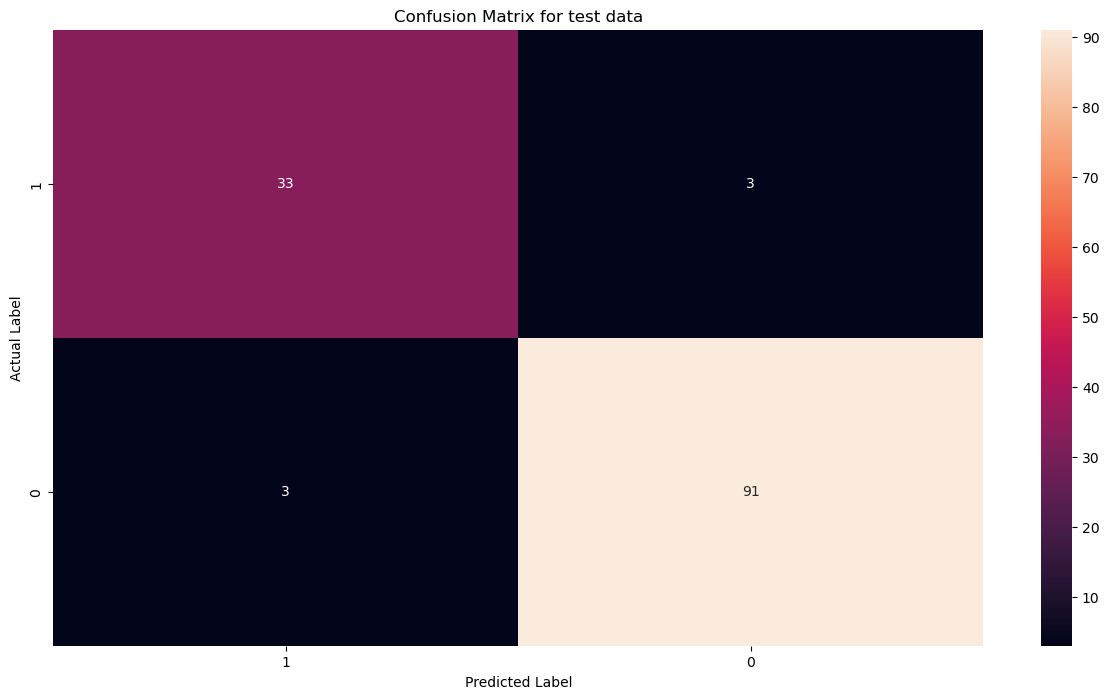

In [60]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(y_test, y_predict)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [61]:
y_hat = model.predict(x_train)
print("Train Accuracy:", accuracy_score(y_train, y_hat))

Train Accuracy: 0.9922480620155039


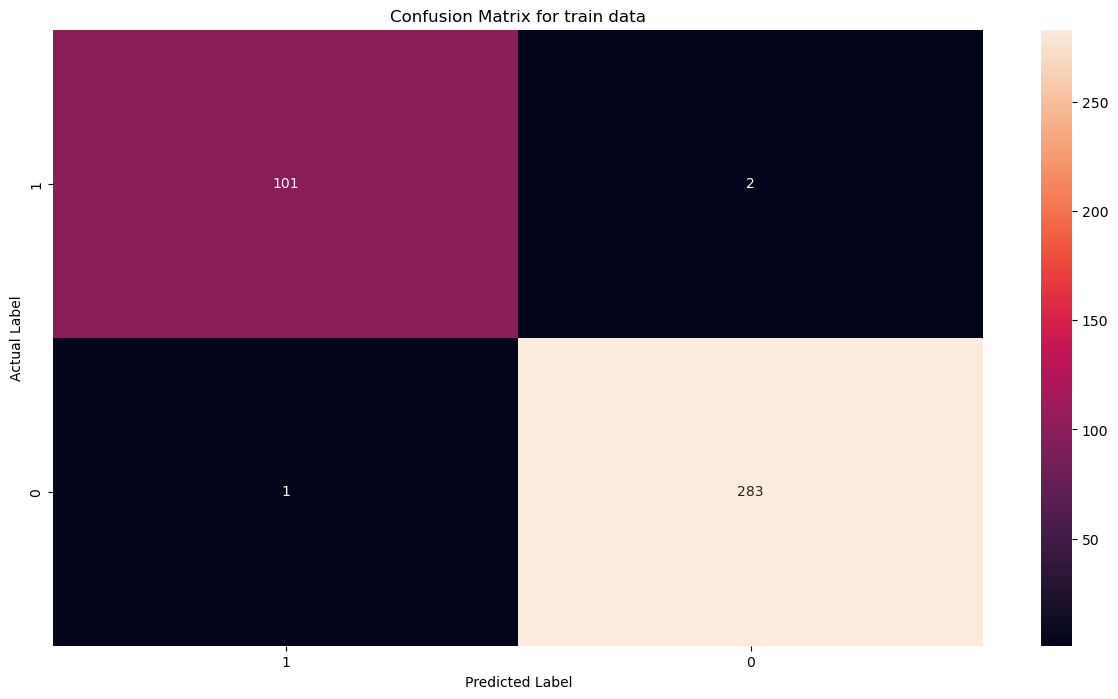

In [62]:
cm_df = confusion_matrix(y_train, y_hat)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()